This notebook:
- creates a graph similar to one that would be created during the game (using networkx)
- visualizes the graph (using matplotlib)
- searches the graph for sentences (the notebook was used to develop the algorithm for this)

In [15]:
# Import libraries
import networkx as nx
import random
import matplotlib.pyplot as plt

# Temp sentences
sentences = [
['one', 'two', 'three'],
['two', 'three', 'four'],
['three', 'four', 'five']
]

# Create a new graph
graph = nx.MultiGraph()

In [16]:
#Functions and for loop to randomly add some nodes and edges to the graph.
# This emulates the graph that would be created during the game.

def get_new_word():
    sentence = sentences[random.randrange(0, len(sentences))]
    word = sentence[random.randrange(0, len(sentence))]
    ##print 'get new word returns : ', word
    return word

class WordObject():
    def __init__(self, word):
        self.word = word

def add_object_to_graph(graph, new_object):
    #add new word
    graph.add_node(new_object, word=new_object.word)
    return graph
    
def add_collision(graph, new_object):
    #get a random existing node for new word to 'collide' with
    collides_with_index = random.randrange(0, graph.number_of_nodes(), 1)
    collides_with = graph.nodes()[collides_with_index]
    #add edge between the two
    ##print 'add edge ', new_object.word, collides_with.word
    graph.add_edge(new_object, collides_with)
    return graph

for i in range(0, 30):
    word = get_new_word()
    new_object = WordObject(word)
    graph = add_object_to_graph(graph, new_object)
    graph = add_collision(graph, new_object)

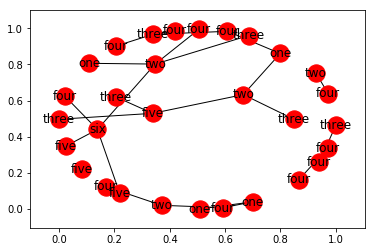

In [17]:
#Draw the graph
labels = nx.get_node_attributes(graph, 'word')
nx.draw_networkx(graph, labels=labels)
plt.show()

In [18]:
 """
look_through takes a list of nodes (neighbors of the previous node which match the previous word
in the sentence), a sentence, i representing the position in the sentence of the previous word.
If the list of nodes is empty, it returns 0
If the list of nodes is not empty, and it represents the last word of the sentence, it returns a 
node from the list
If the list is not empty, and it doesn't represent the last word of the sentence, it iterates
through the nodes in the lsit and gets a list of neighboring nodes matching the next word in the 
sentence.  Then it calls itself with that list
"""
def look_through_neighbors(neighbors, i, sentence):
    i += 1  
    
    if len(neighbors) == 0: #input list empty (no matching neighbors for previous node)
        return 0
    
    elif len(neighbors) > 0 and i == len(sentence): #nodes in input list (representing last word) -> send one back
        return [neighbors[0]]
    
    elif len(neighbors) > 0: #input list not empty, there are matching neighbors
        # for each neighbor, get its neighbors which match the next word
        # call look through on those 
        for neighbor in neighbors:
            matching_neighbors = [node for node in graph.neighbors(neighbor) if node.word == sentence[i]] 
            match = look_through_neighbors(matching_neighbors, i, sentence)
            if isinstance(match, list): #use instance not type more robust/extensible/pythonic
                match.append(neighbor)
                return match
            
        


In [19]:
for sentence in sentences:
    i = 0
    start_nodes = [node for node in graph.nodes() if node.word == sentence[i]] 
    match = look_through_neighbors(start_nodes, i, sentence)
    if match: 
        print 'the nodes ', match, ' make a sentence of the following words:'
        for item in match:
            print item.word
            


the nodes  [<__main__.WordObject instance at 0x7fca2f1ff128>, <__main__.WordObject instance at 0x7fca2dd09dd0>, <__main__.WordObject instance at 0x7fca2dbae128>]  make a sentence of the following words:
three
two
one
